<h1><center>Machine Learning as way to improve ITSM processes</center></h1>

## Business Case

In [5]:
# correct the business case

ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade.
ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.
4 key areas, where ML can help ITSM process in ABC Tech.
1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.
2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.
3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

## Domain Analysis

In [6]:
#  give explainations

* CI_Name - SUB000508
* CI_Cat - subapplication
* CI_Subcat - Web Based Application
* WBS - WBS000162
* Incident_ID - IM0000004
* Status - Closed
* Impact - 4
* Urgency - 4
* Priority - 4
* Category - incident
* KB_number - KM0000553
* Alert_Status - closed
* No_of_Reassignments - 26
* Open_Time - 05/02/2012 13:32:57
* Reopen_Time
* Resolved_Time - 04/11/2013 13:50:27
* Close_Time - 04/11/2013 13:51:17
* Handle_Time_hrs - 3871,691111
* Closure_Code - Other
* No_of_Related_Interactions - 1
* Related_Interaction - SD0000007
* No_of_Related_Incidents - 2
* No_of_Related_Changes - 1
* Related_Change - C00000056

In [ ]:
pip install -

In [35]:
import os
# import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
connection=mysql.connector.connect(host='18.136.157.135',
                                    user='dm_team',
                                    password='DM!$Team@&27920!',
                                    database= "project_itsm")
    


In [ ]:
db_tables = pd.read_sql_query('show tables', connection)
print(db_tables)

  Tables_in_project_itsm
0           dataset_list


In [ ]:
df = pd.read_sql_query('SELECT * FROM dataset_list',connection)

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df.to_csv('ABCtech.csv',index=False)

In [2]:
df=pd.read_csv('ABCtech.csv')

In [3]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [ ]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [ ]:
df.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [ ]:
df.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


In [ ]:
data

### Exploratory Data Analysis

In [22]:
numerical_data=df.select_dtypes(exclude="O").columns
categorical_data=df.select_dtypes(include="O").columns

In [23]:
categorical_data

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Category', 'KB_number', 'Alert_Status',
       'Open_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'Related_Interaction'],
      dtype='object')

In [24]:
values_to_remov=["CI_Name", 'WBS', 'Incident_ID', 'KB_number',
       'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs',  'Related_Interaction',
       'Related_Change']

In [25]:
col_without=[col for col in categorical_data if col not in values_to_remov]

In [26]:
col_without

['CI_Cat',
 'CI_Subcat',
 'Status',
 'Impact',
 'Urgency',
 'Category',
 'Alert_Status',
 'Closure_Code']

In [27]:
numerical_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions'],
      dtype='object')

In [ ]:
len(numerical_data)

6

In [ ]:
len(categorical_data)

19

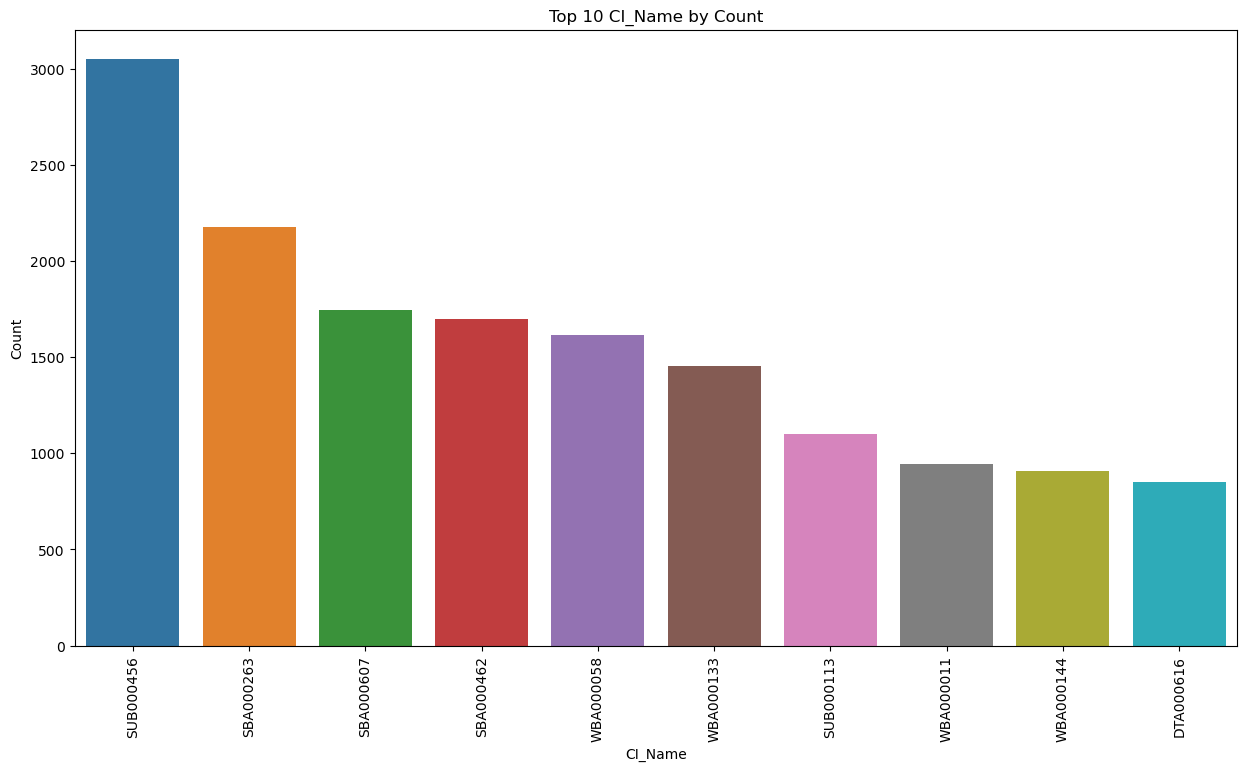

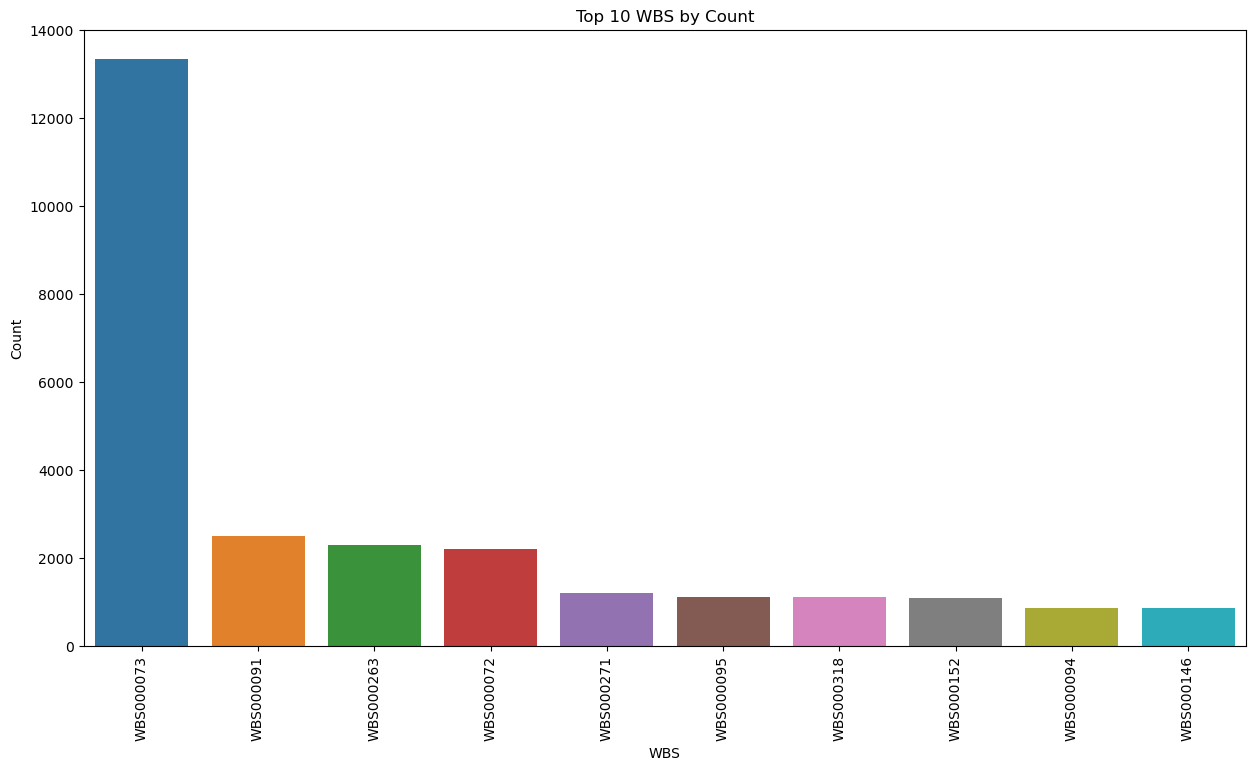

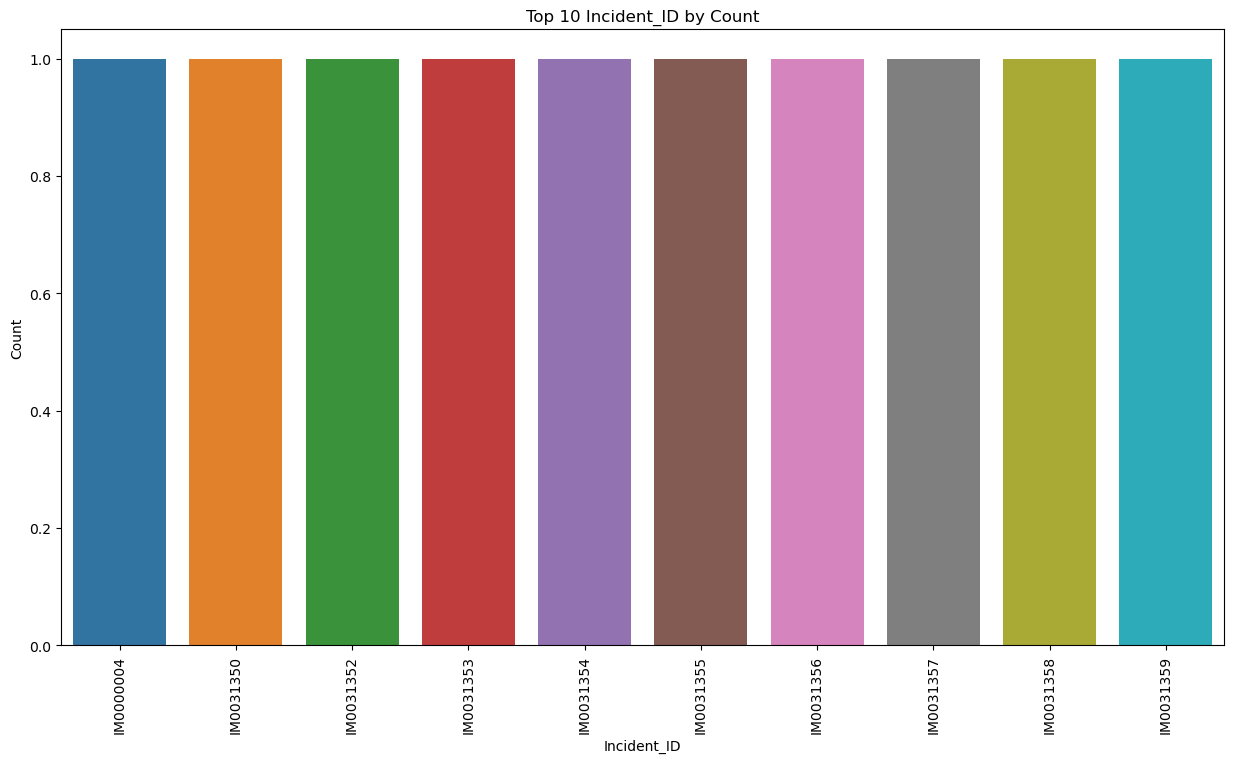

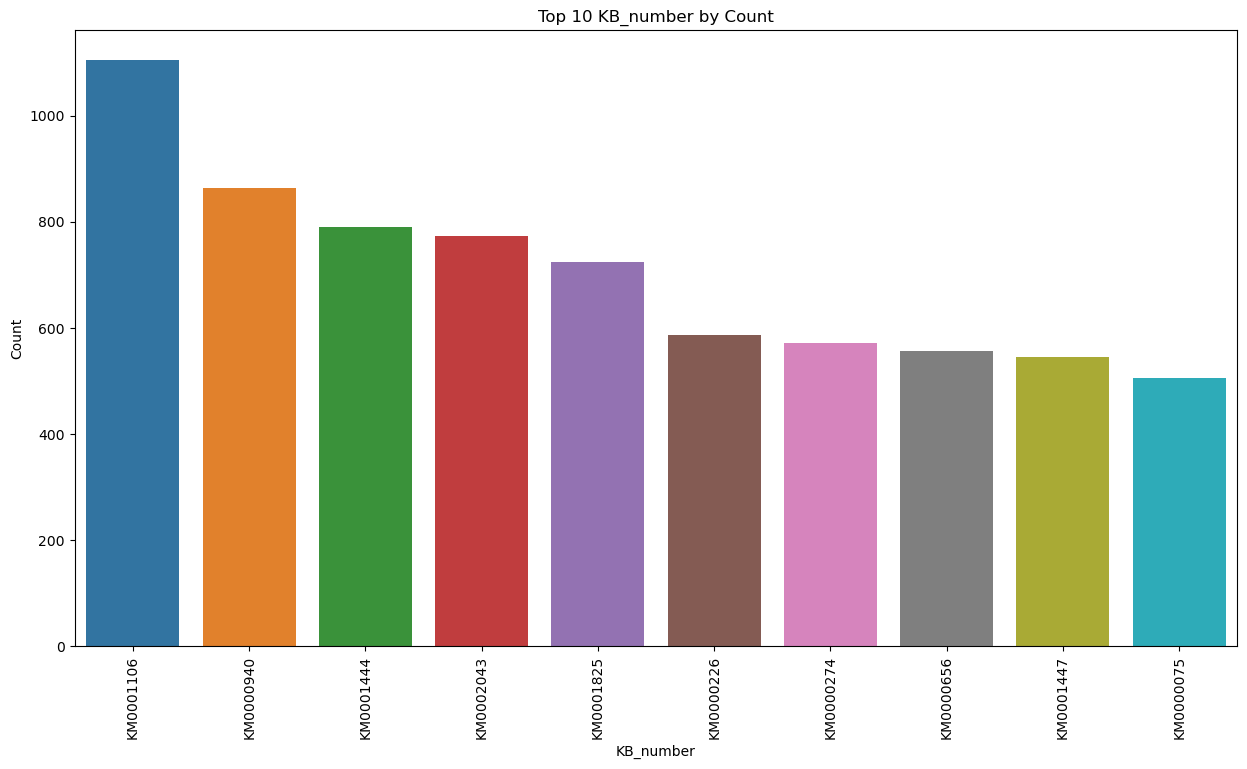

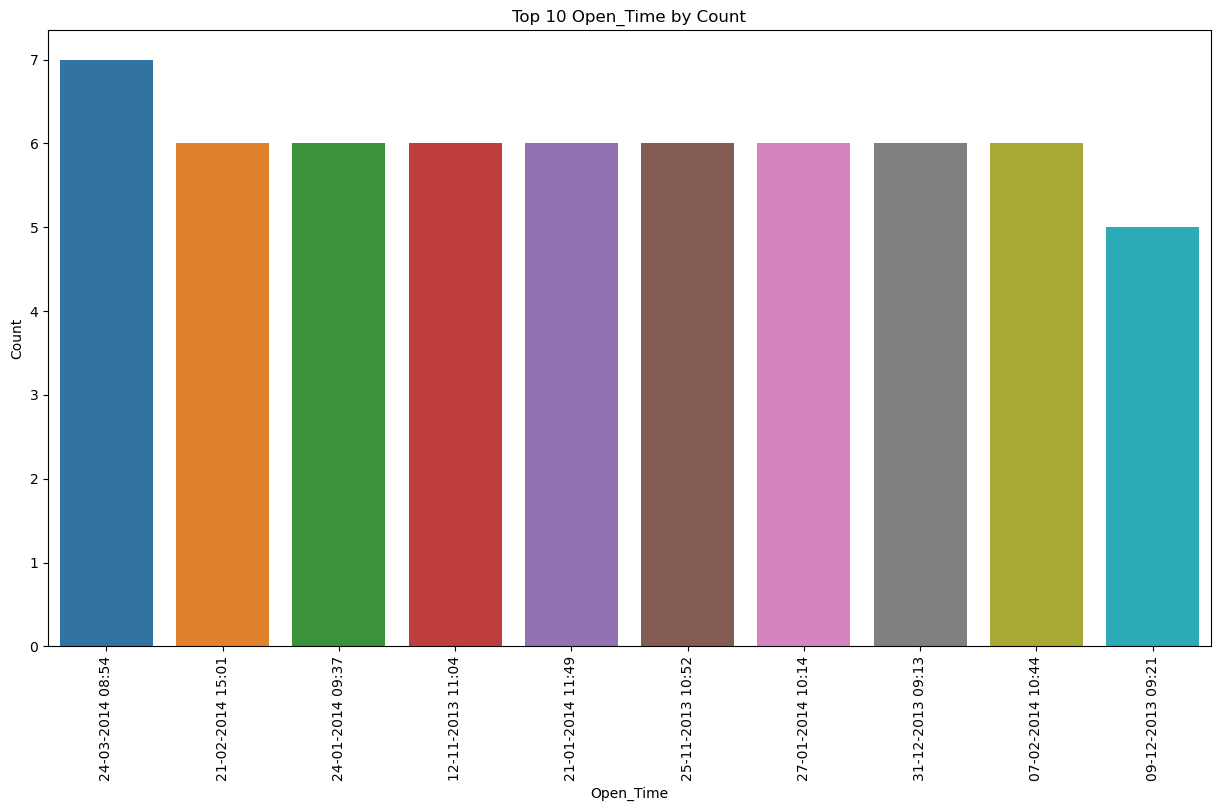

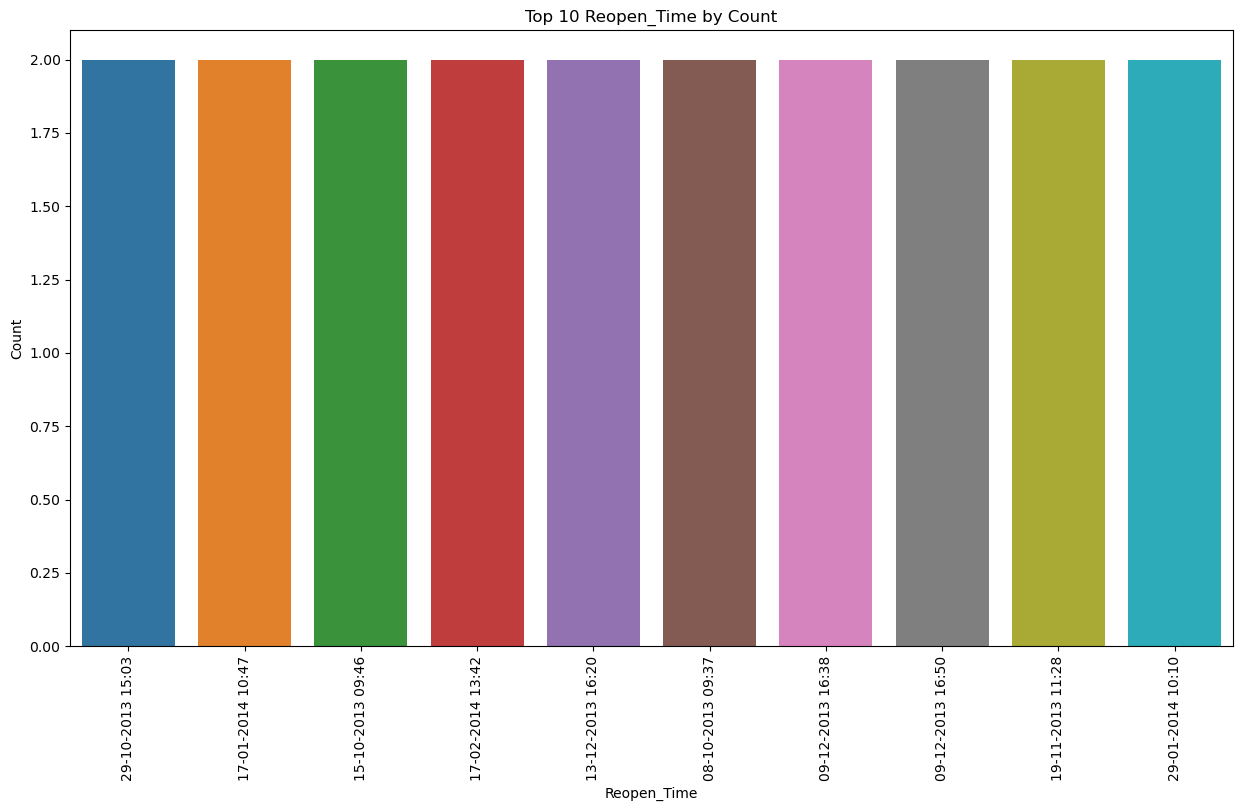

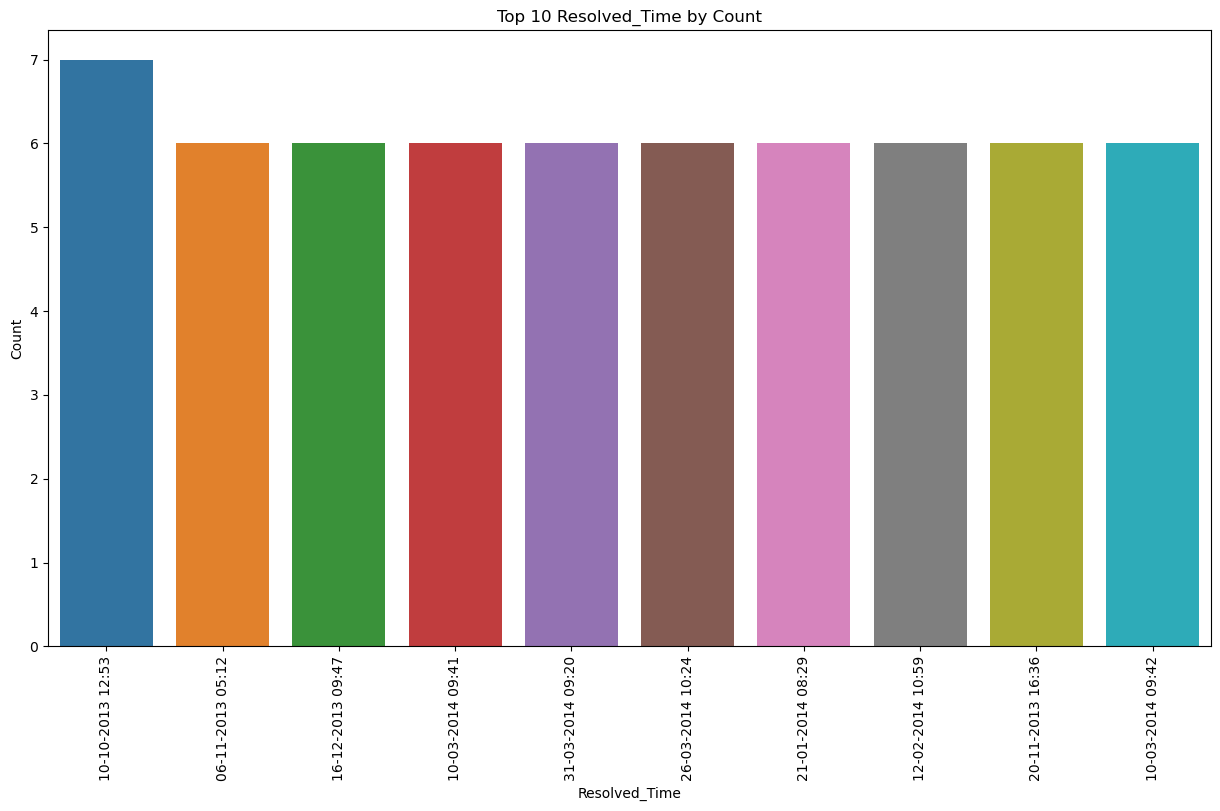

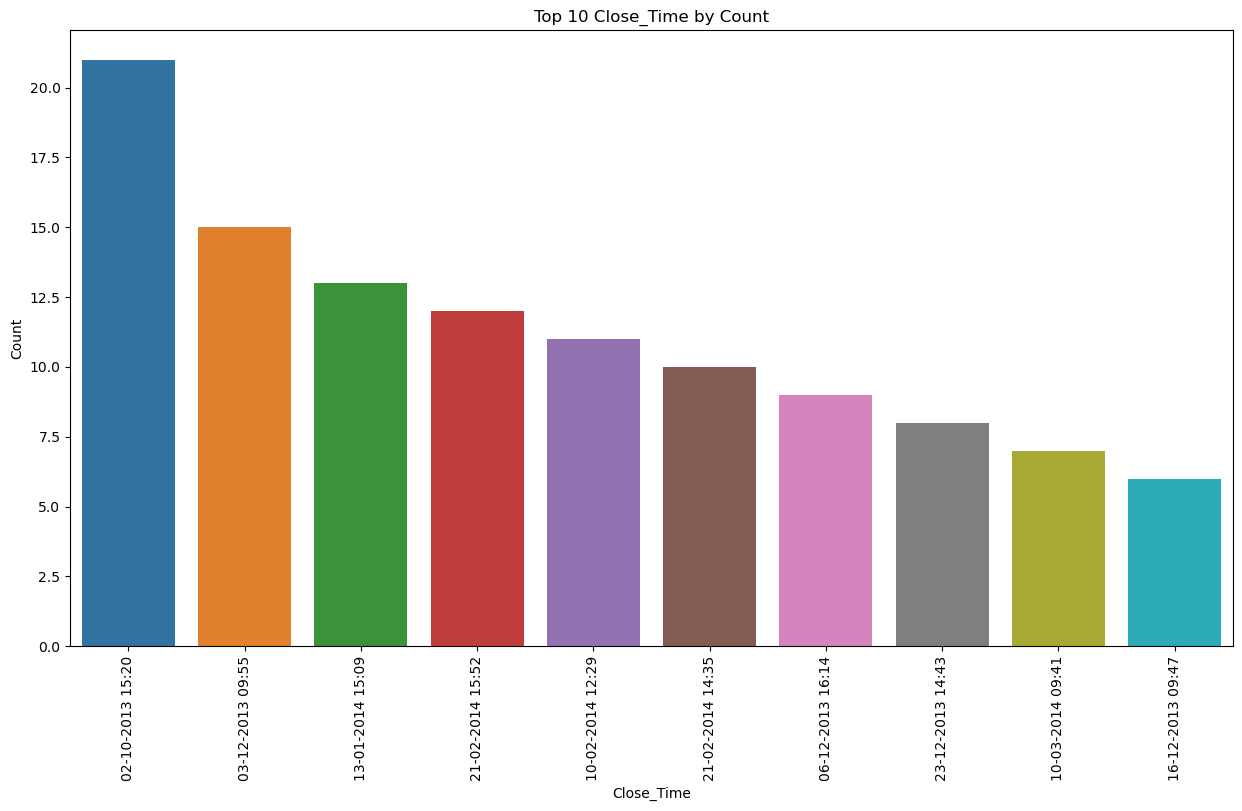

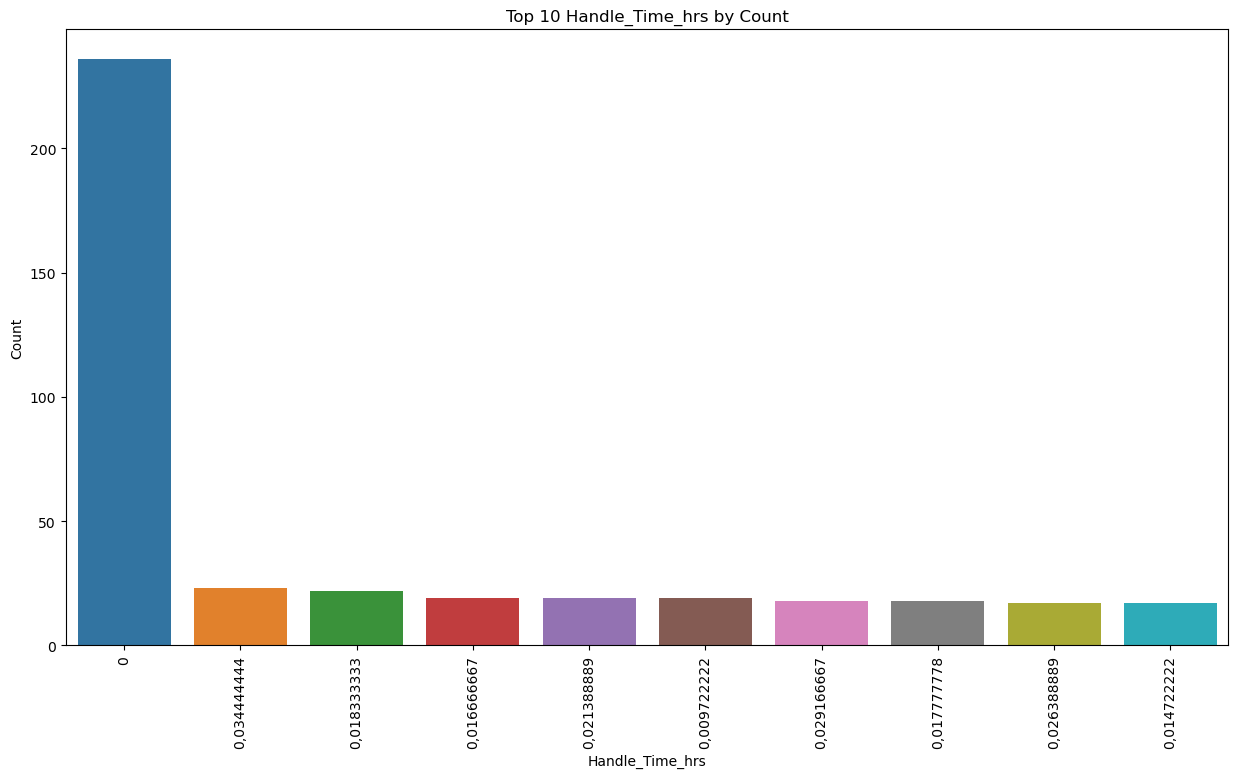

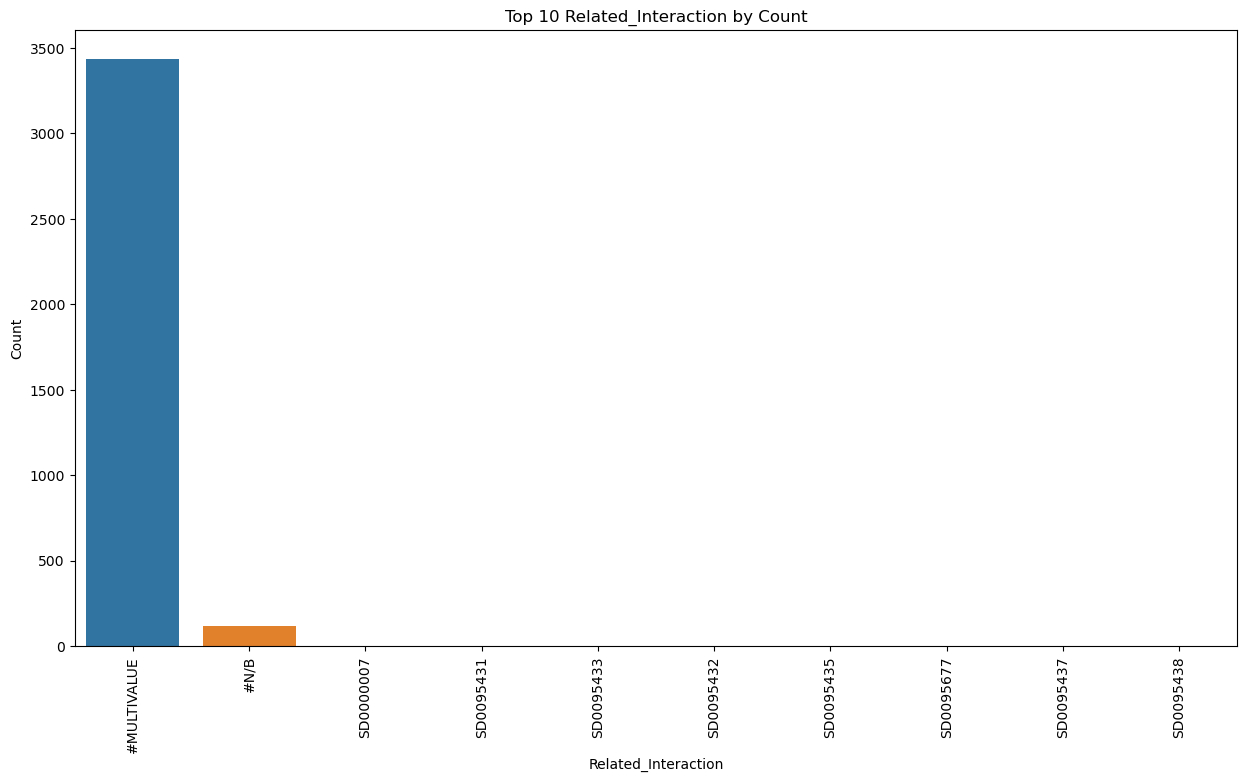

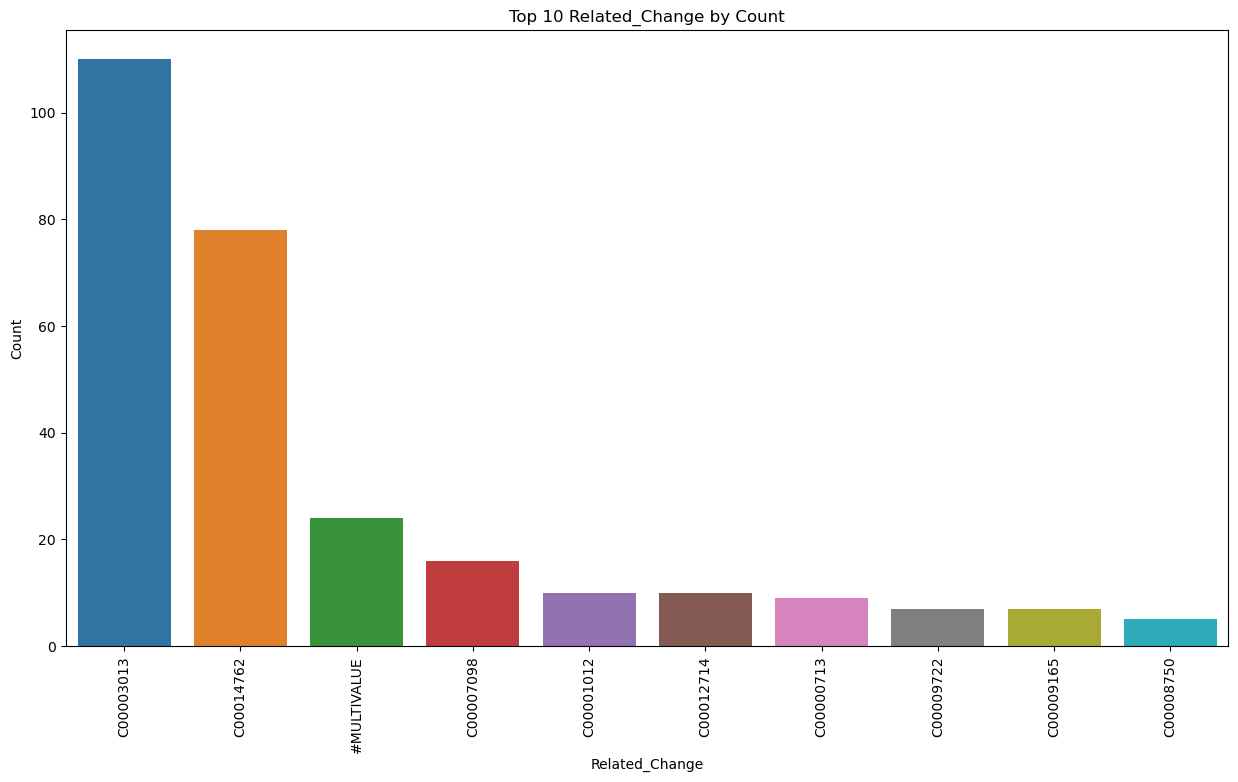

In [ ]:
for col in values_to_remov:
# Calculate counts for each nationality
    unique_counts = df[col].value_counts()

    # Select top 10 countries
    top_10_unique = unique_counts.head(10)

    # Plot the countplot for top 10 countries
    plt.figure(figsize=(15, 8))
    sns.barplot(x=top_10_unique.index, y=top_10_unique.values)
    plt.title(f'Top 10 {col} by Count')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation='vertical')
    plt.show()

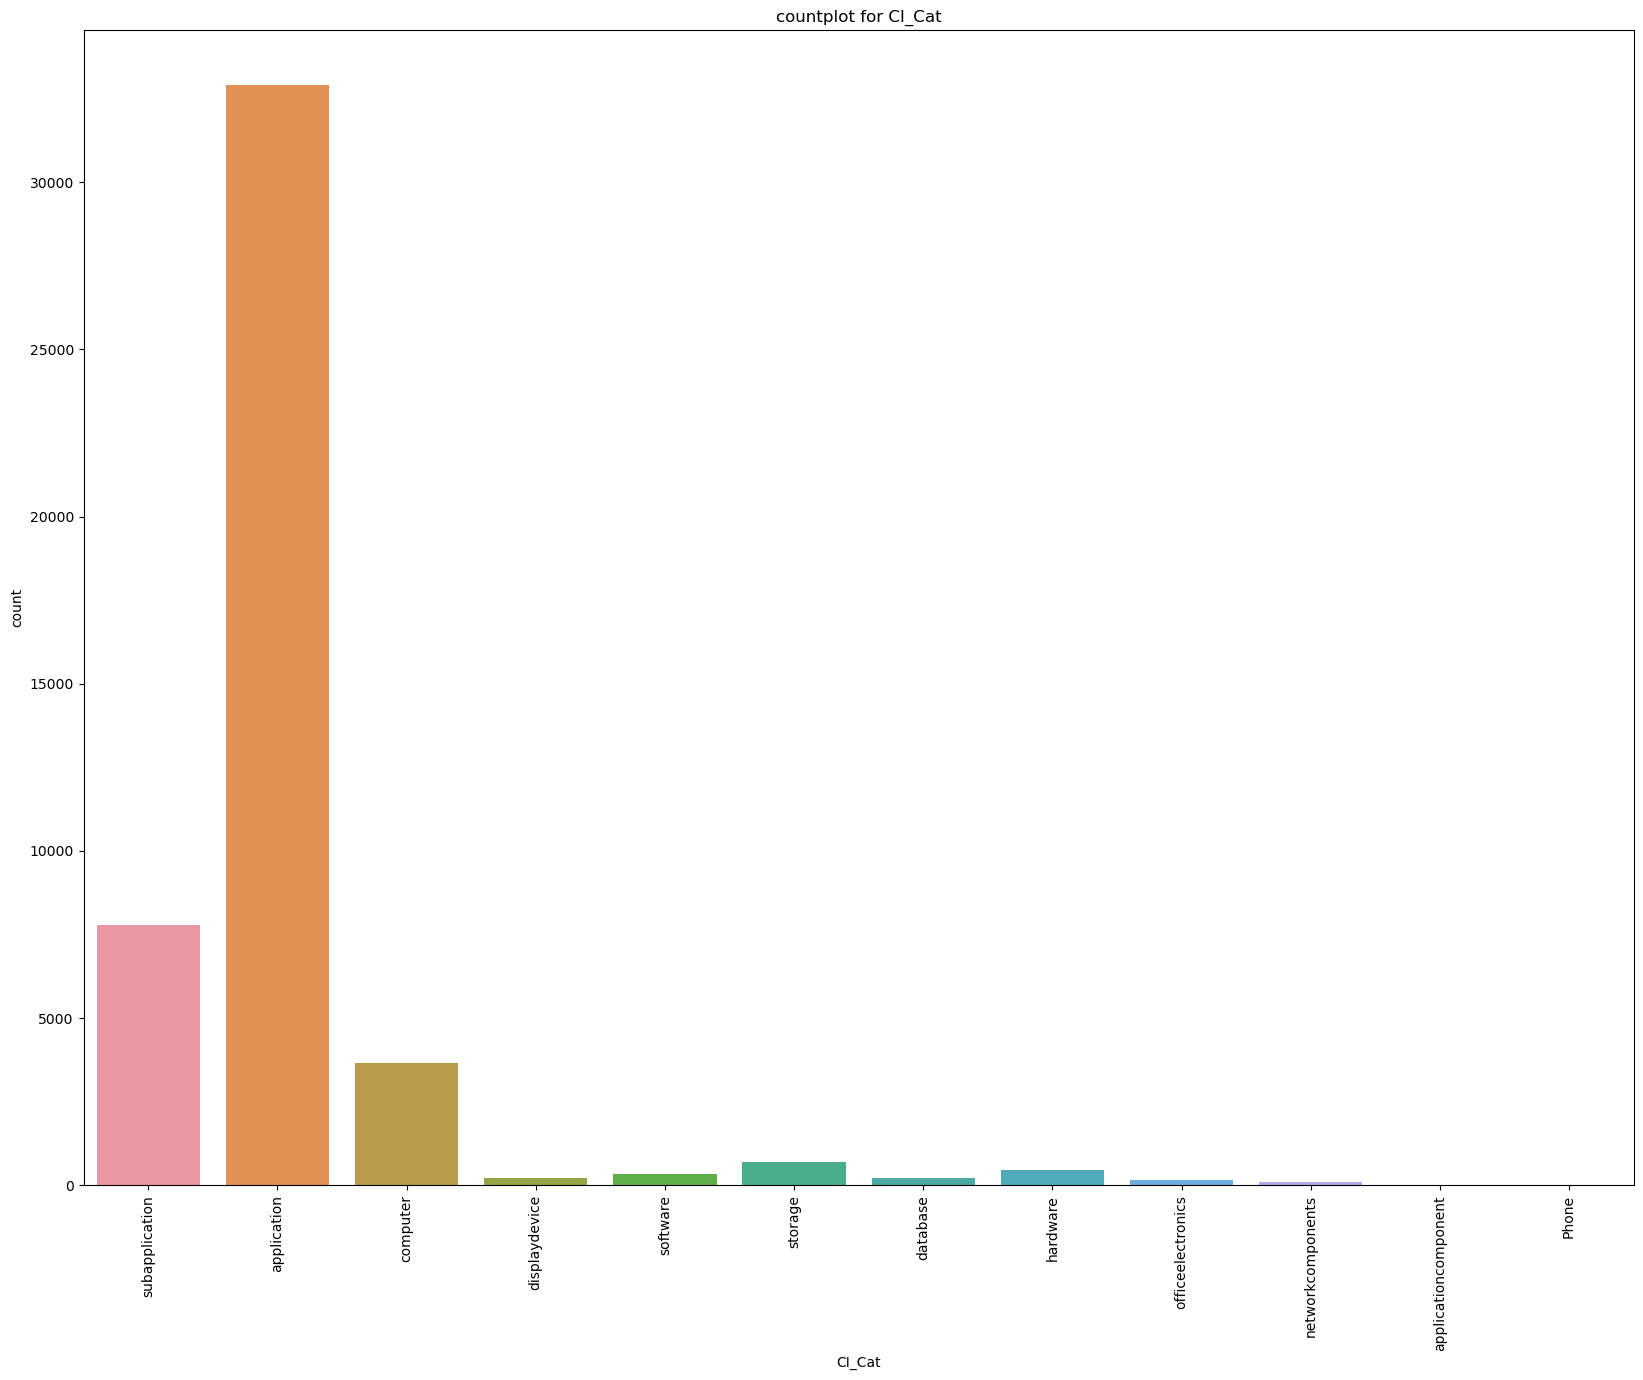

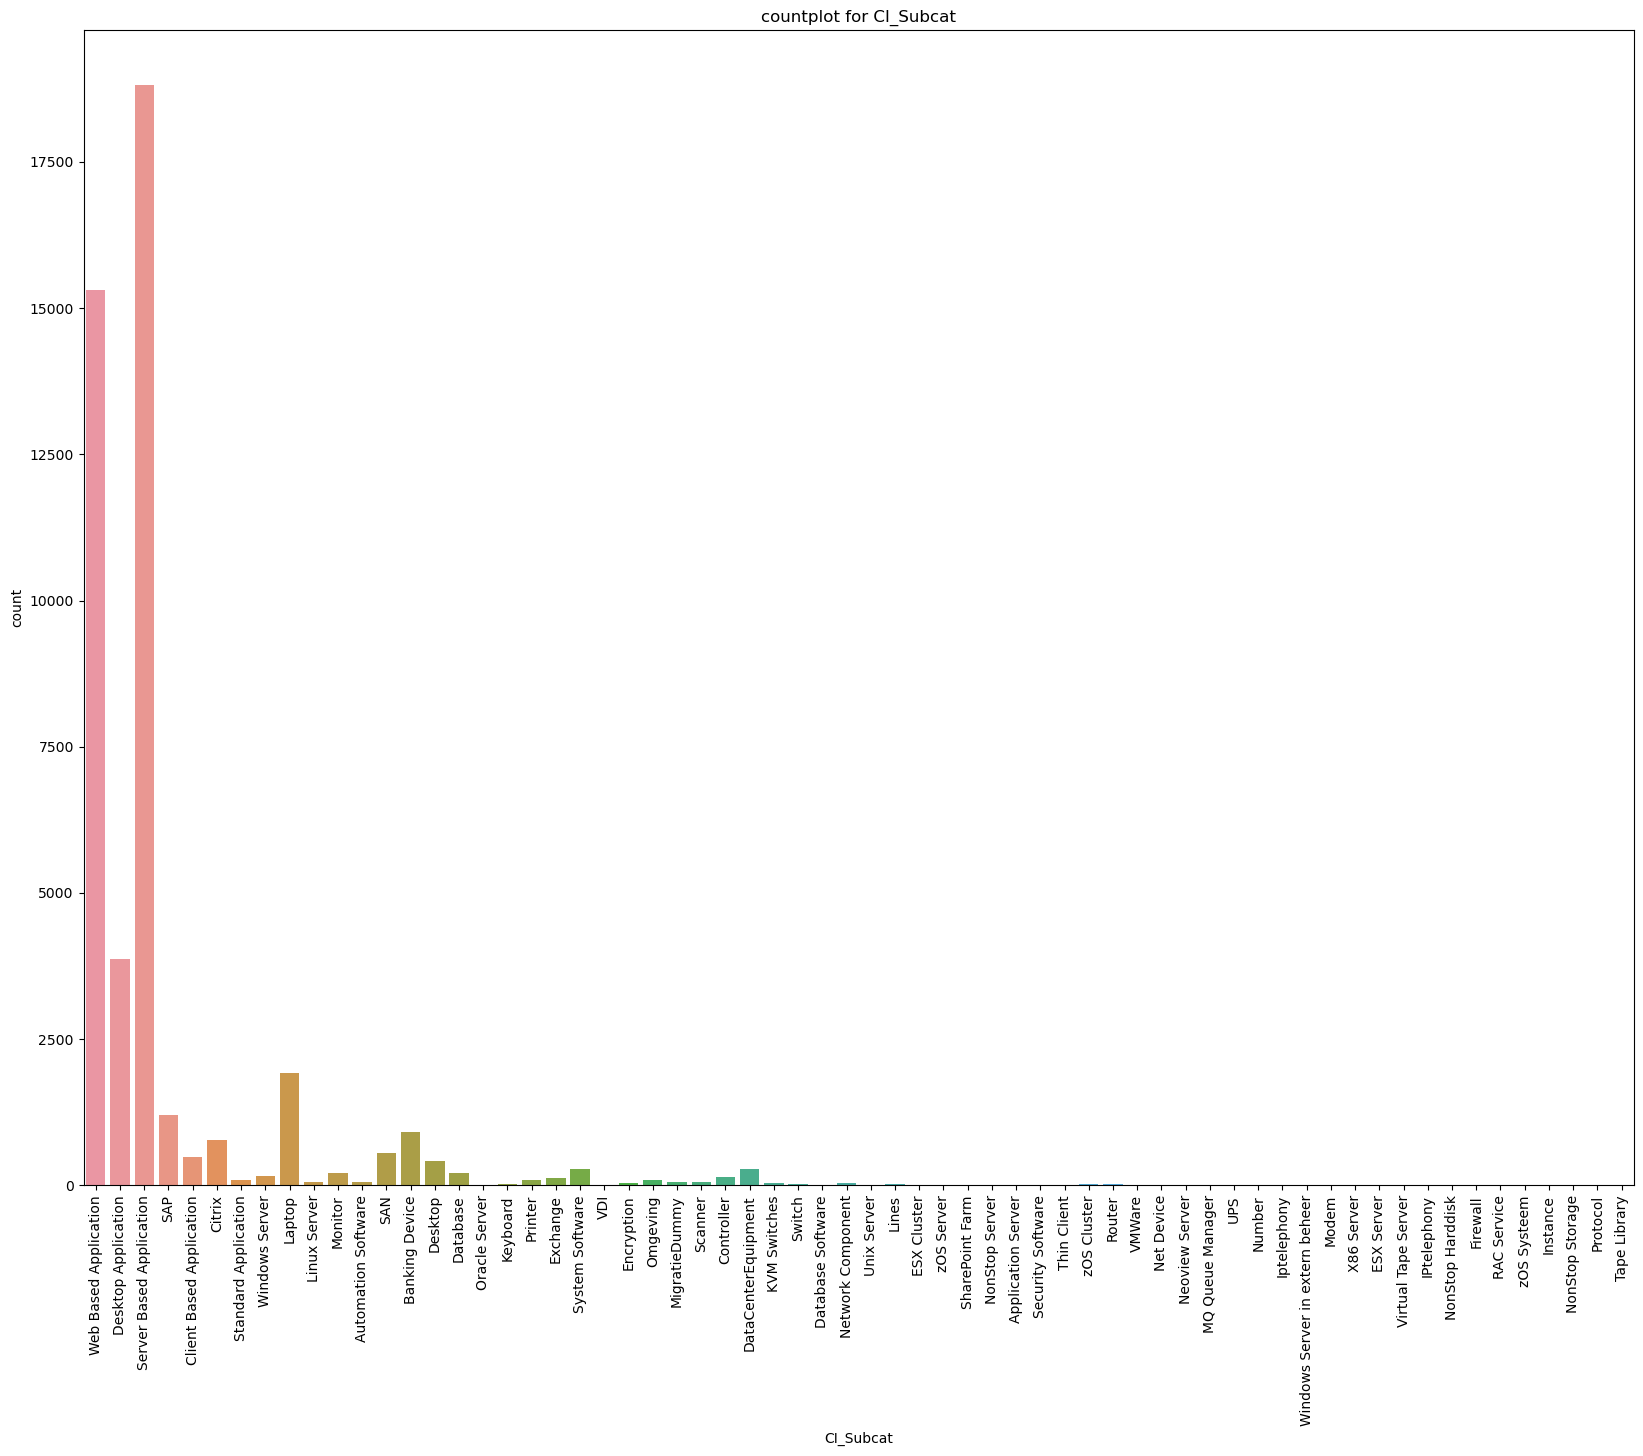

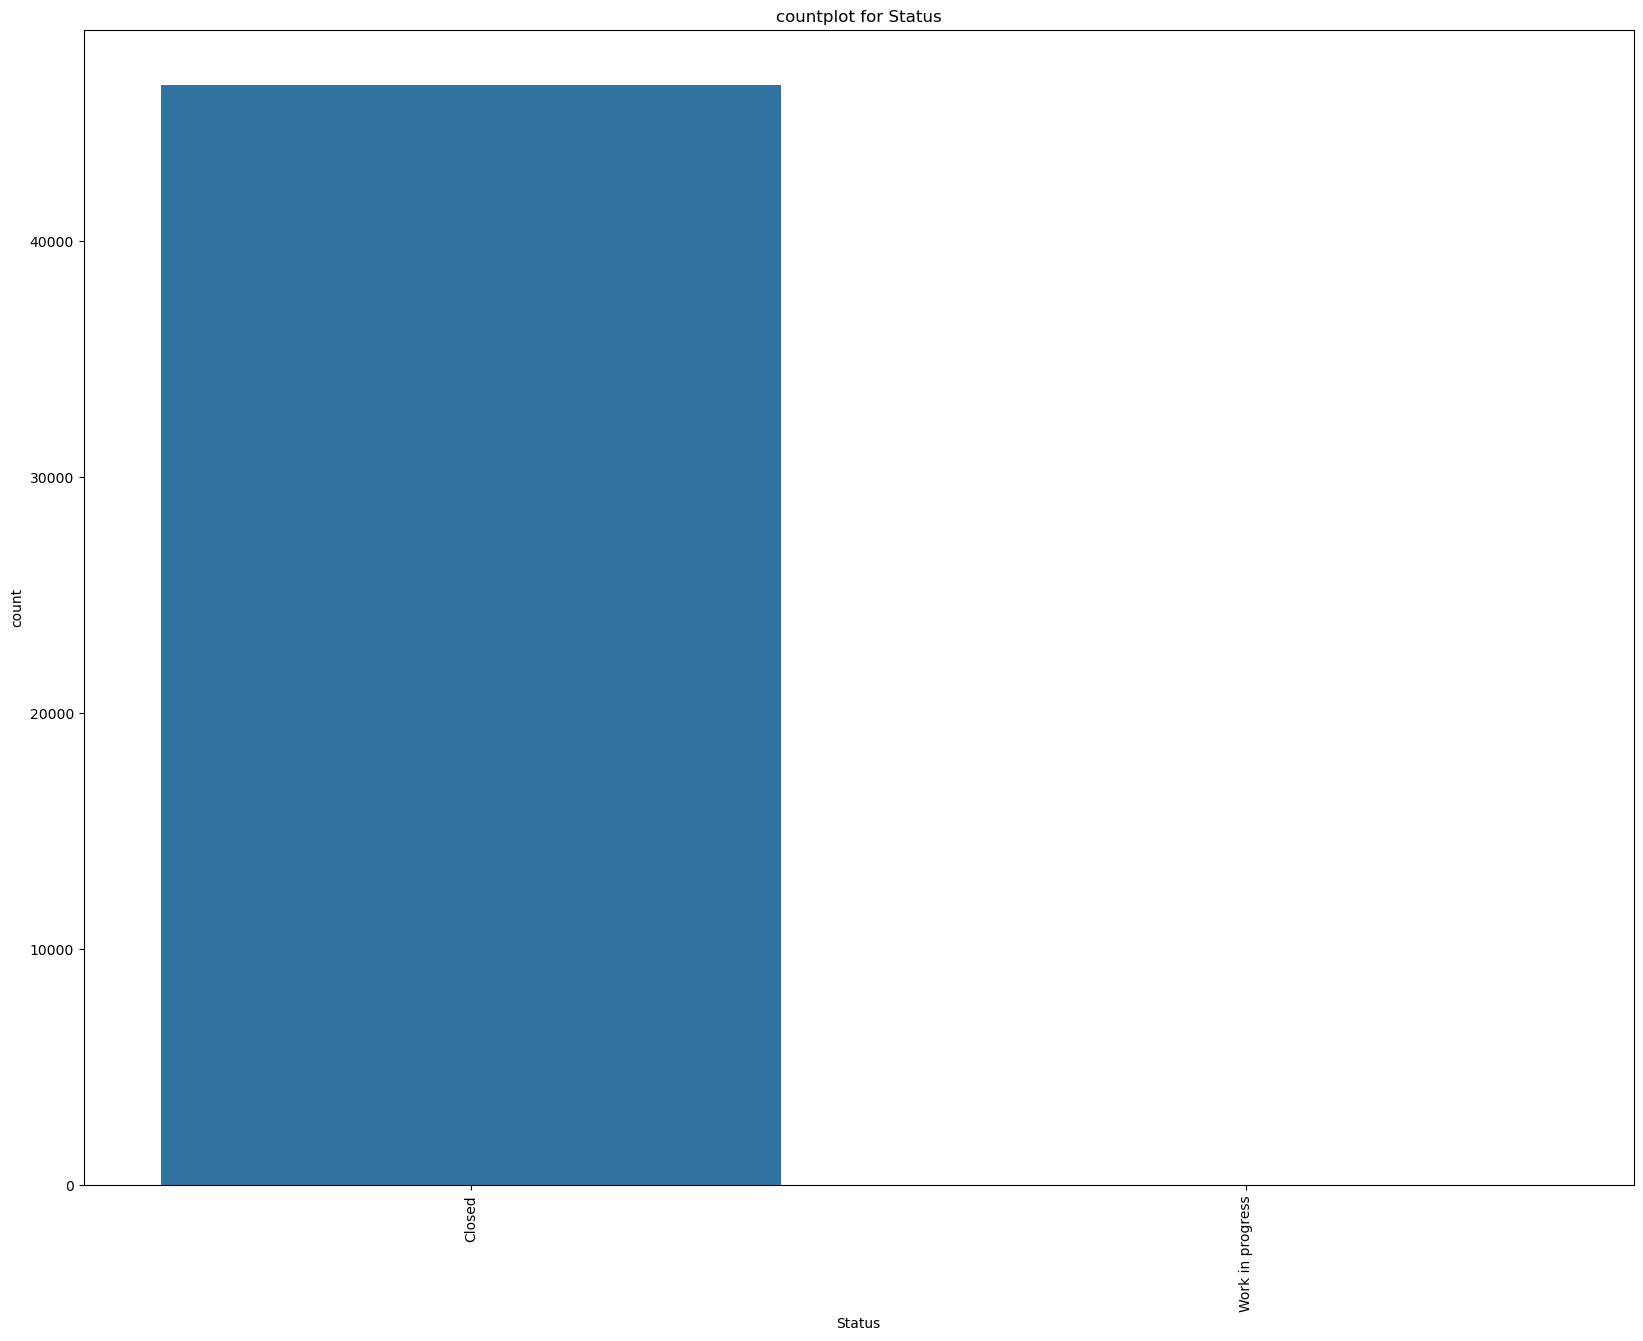

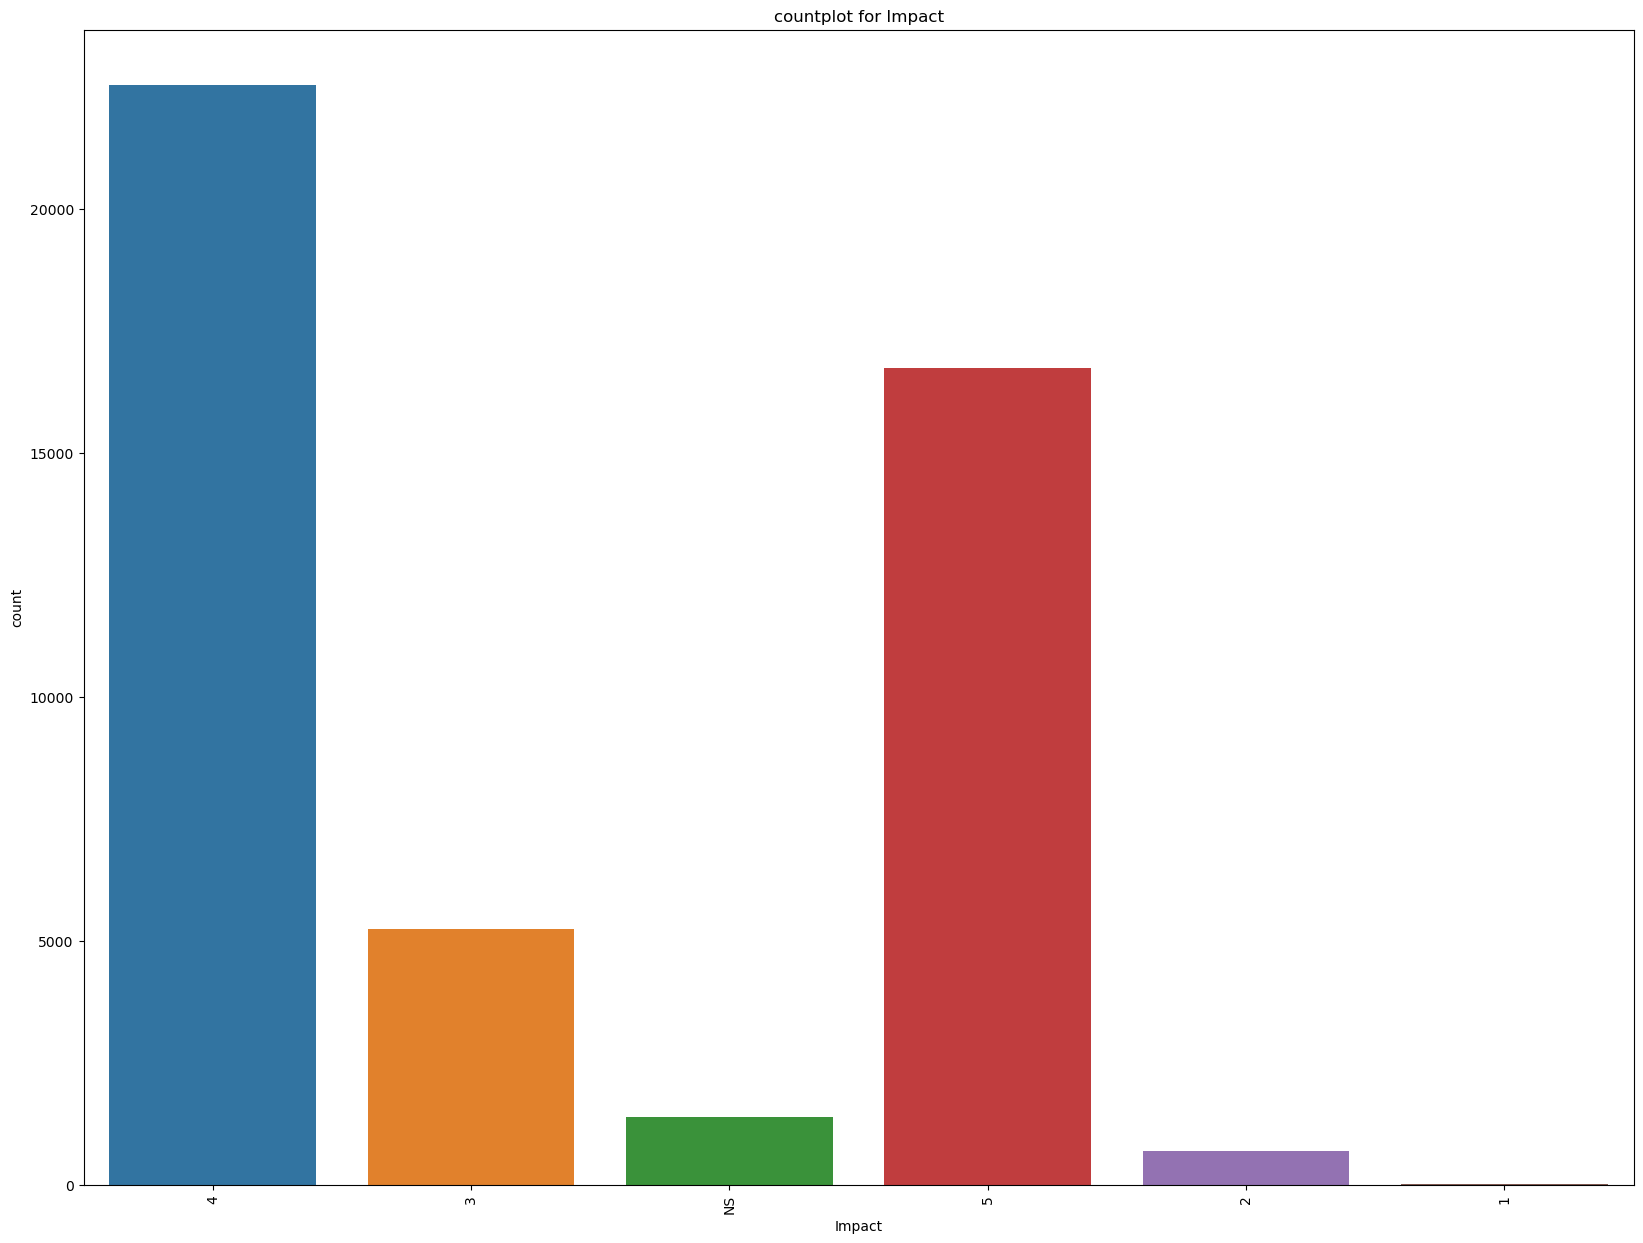

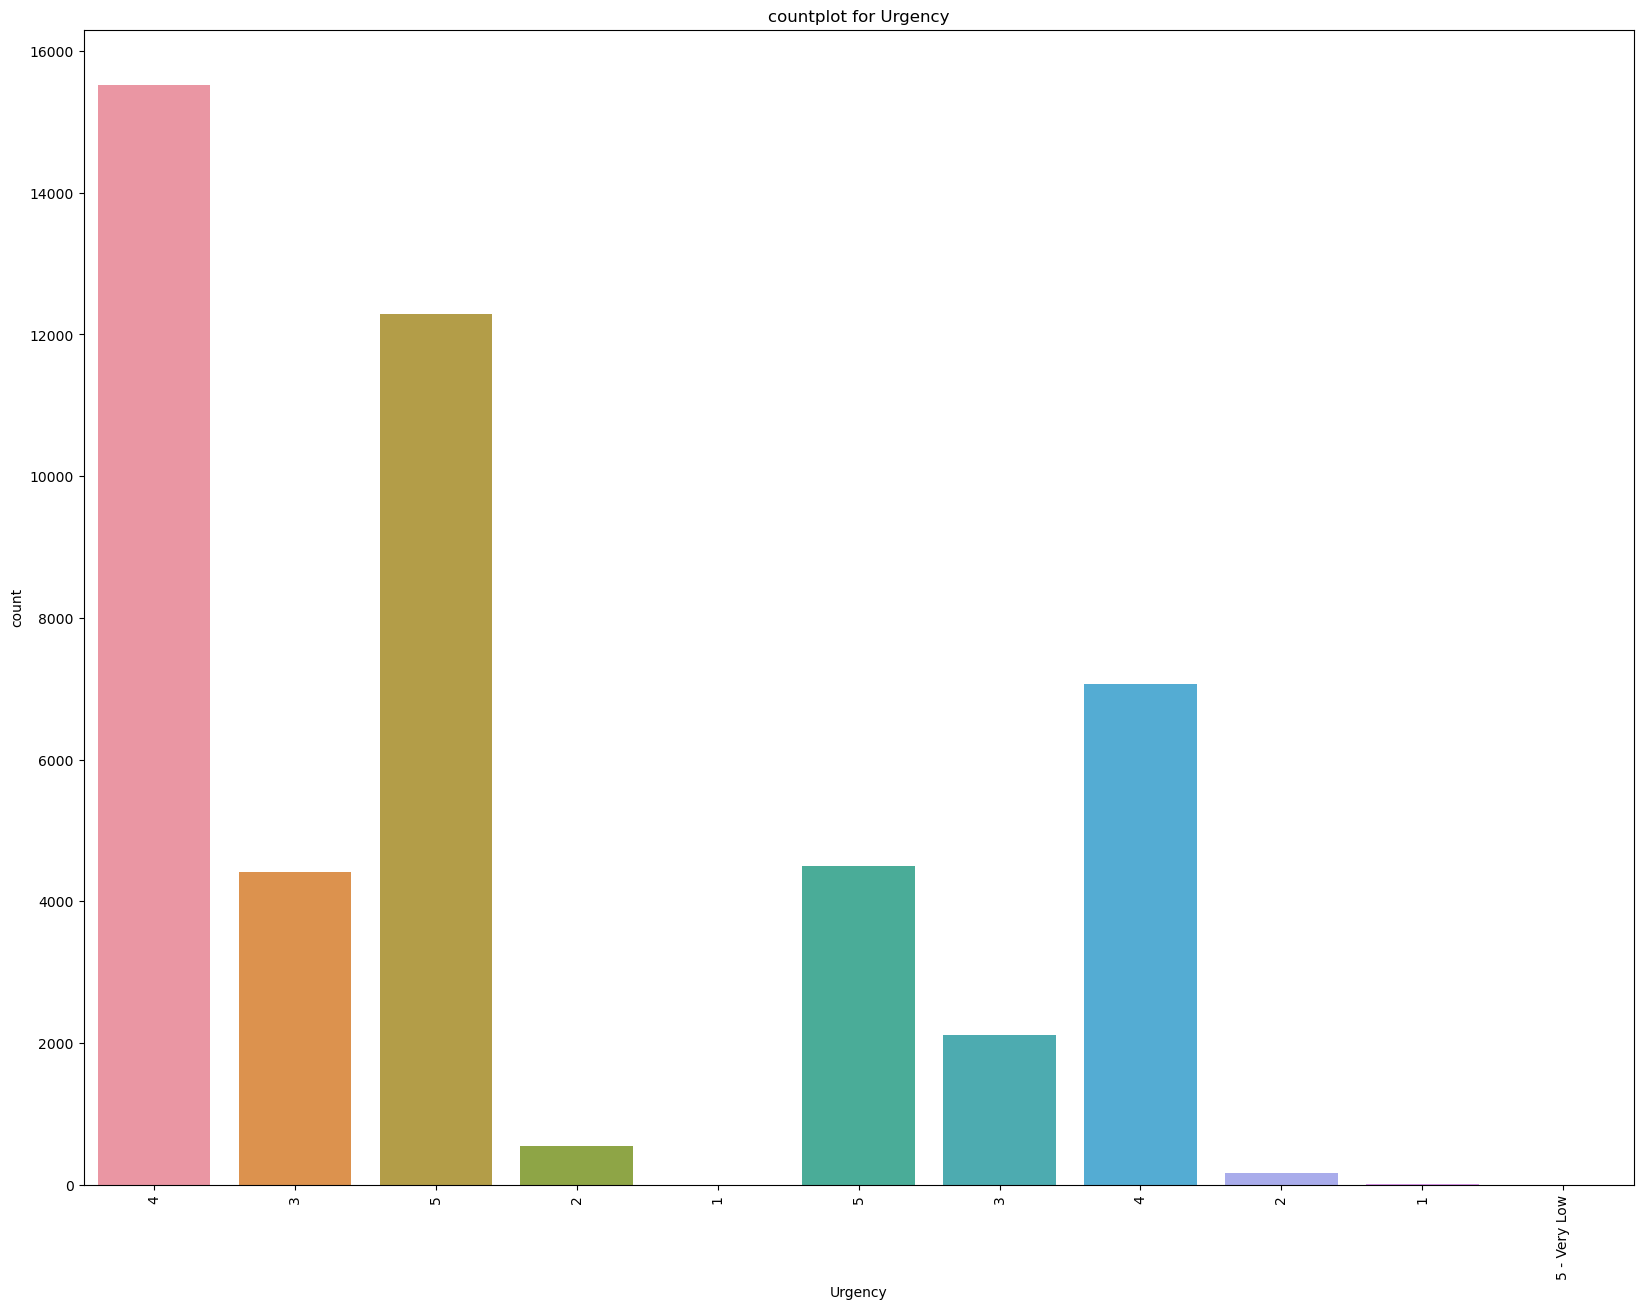

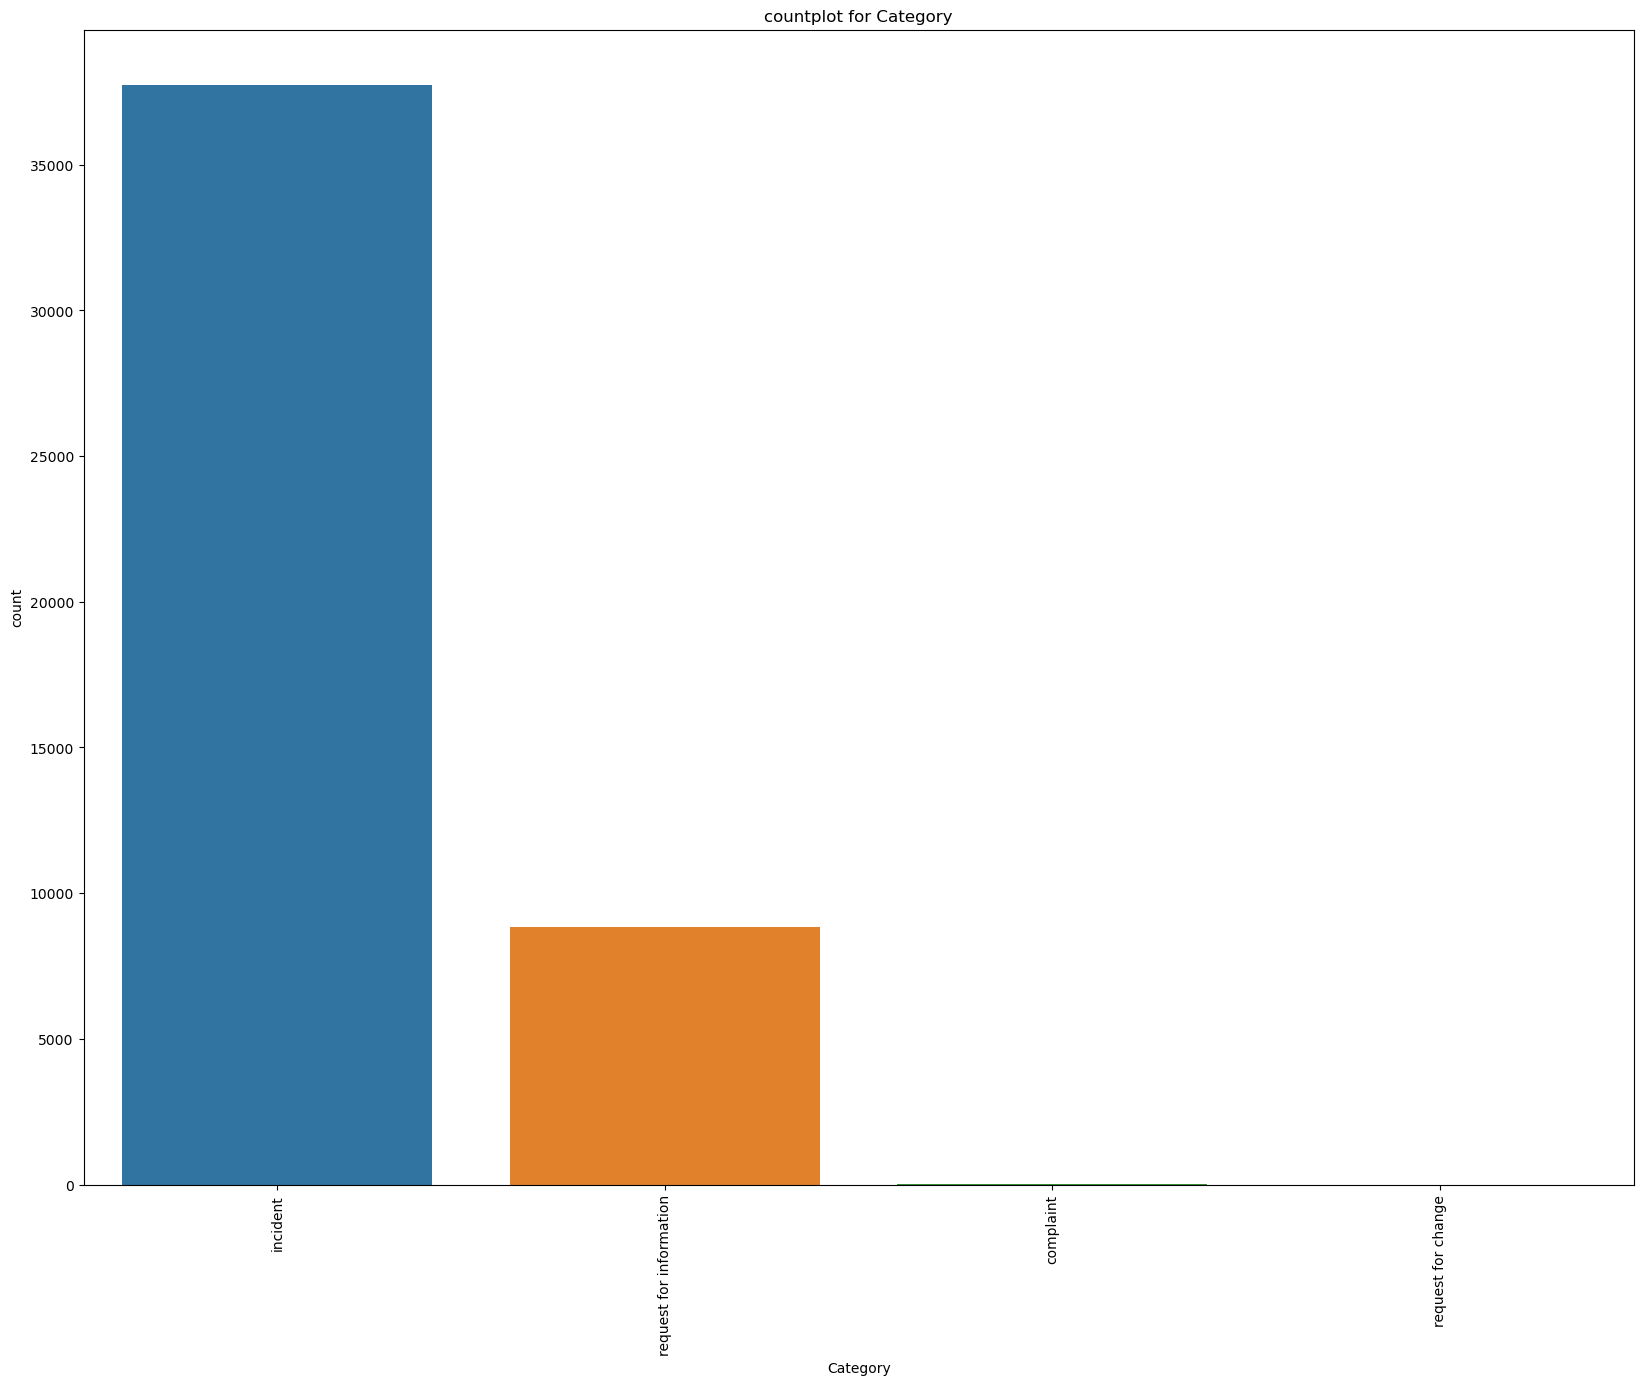

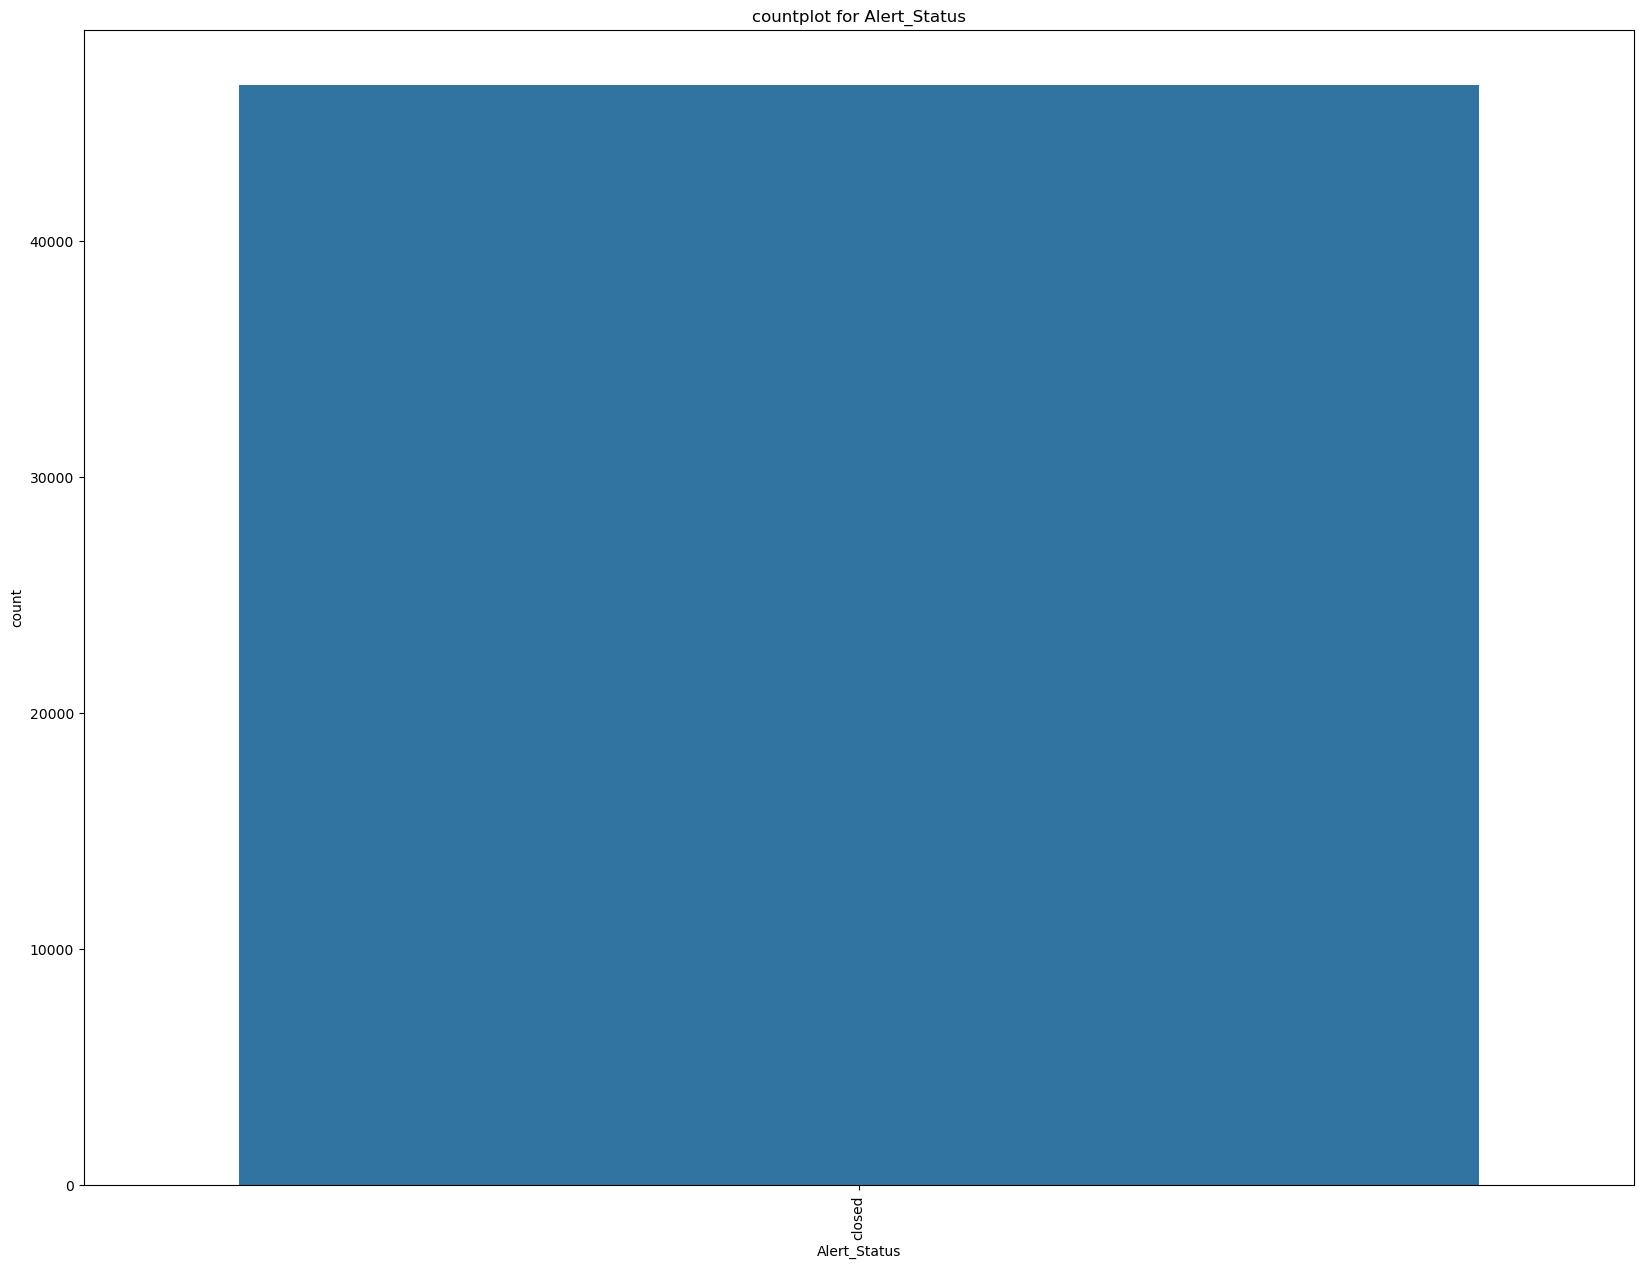

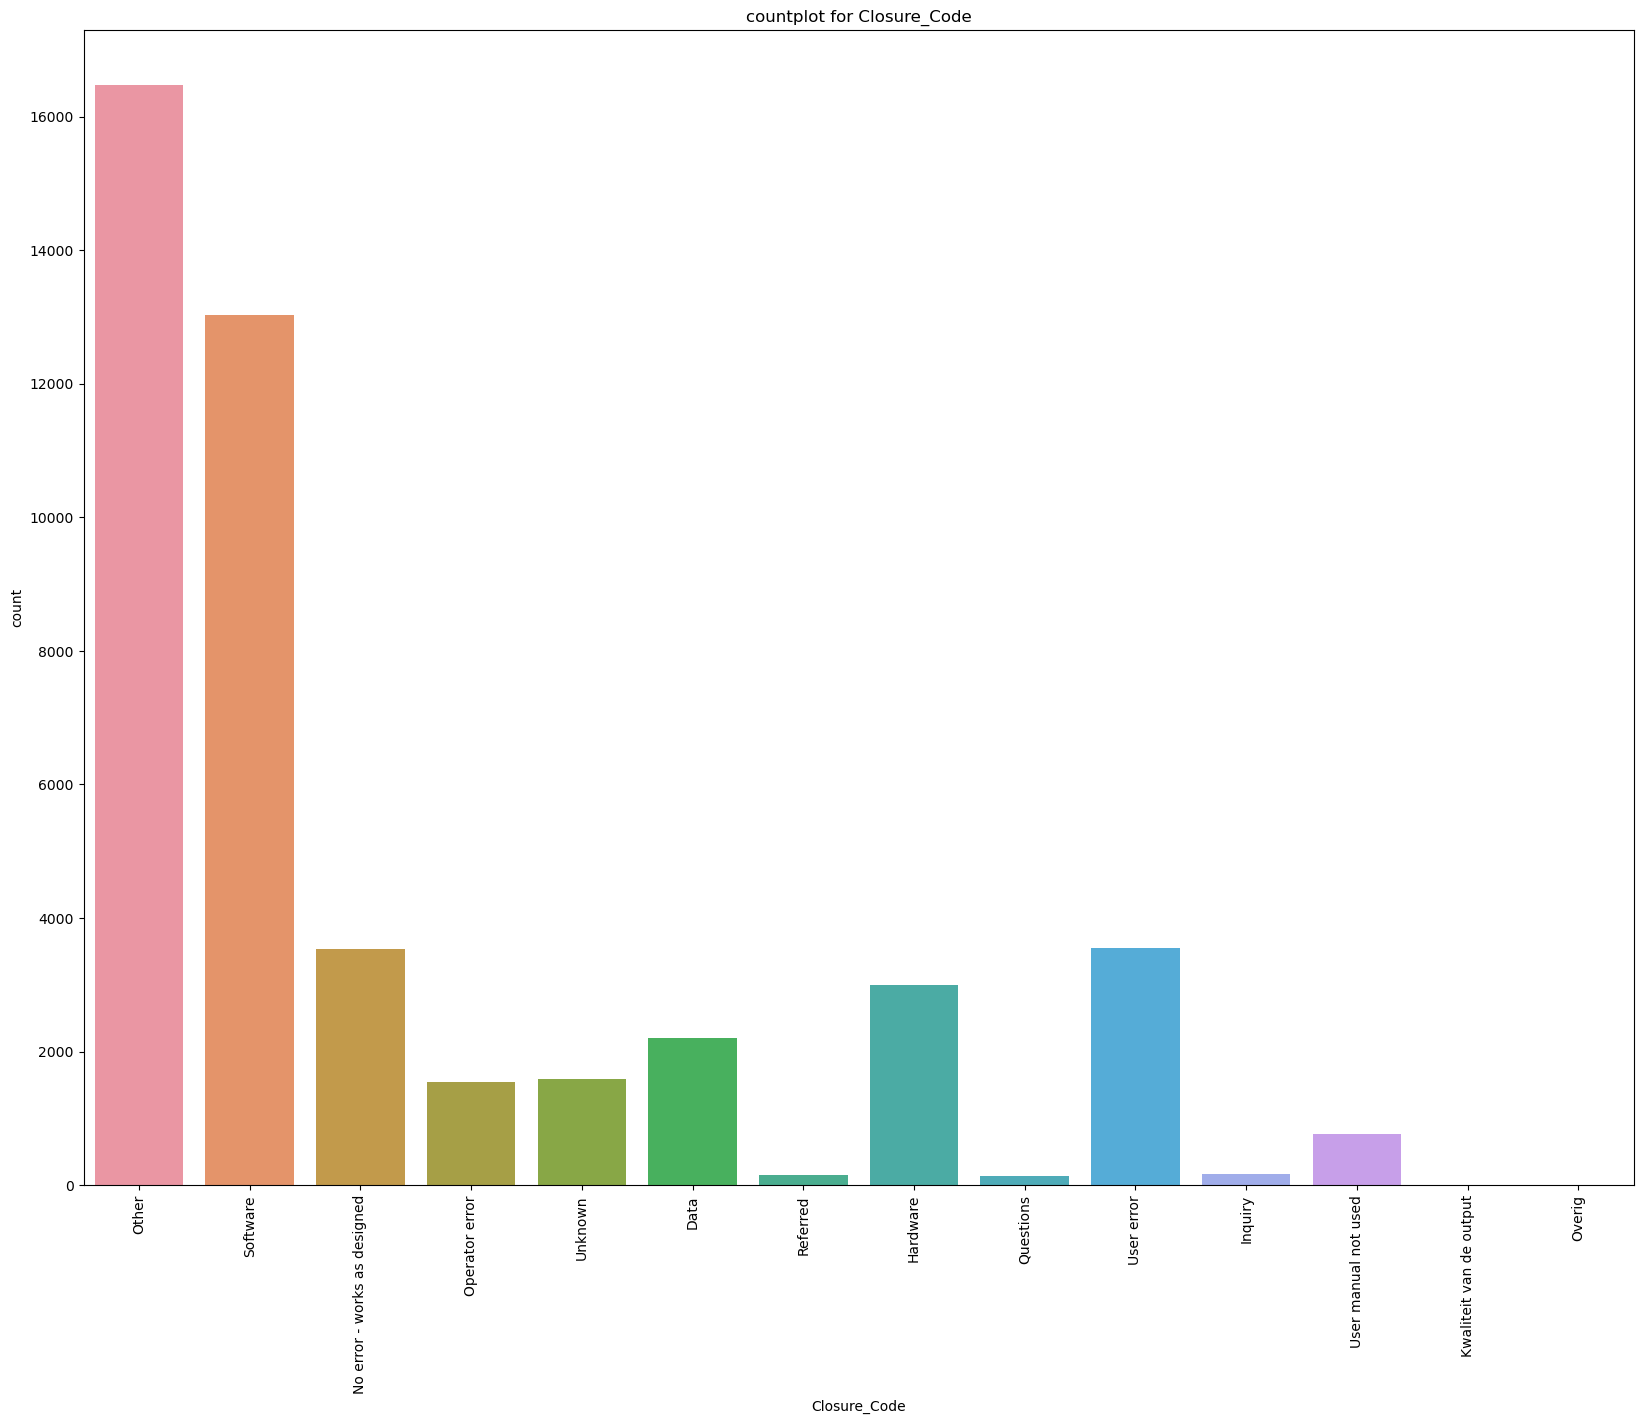

In [ ]:
# plt.figure(figsize=(20,15))

for col in col_without:
    plt.figure(figsize=(20,15))
    sns.countplot(x=df[col])
    plt.title(f'countplot for {col}')
    plt.xticks(rotation="vertical")
    plt.show()
    

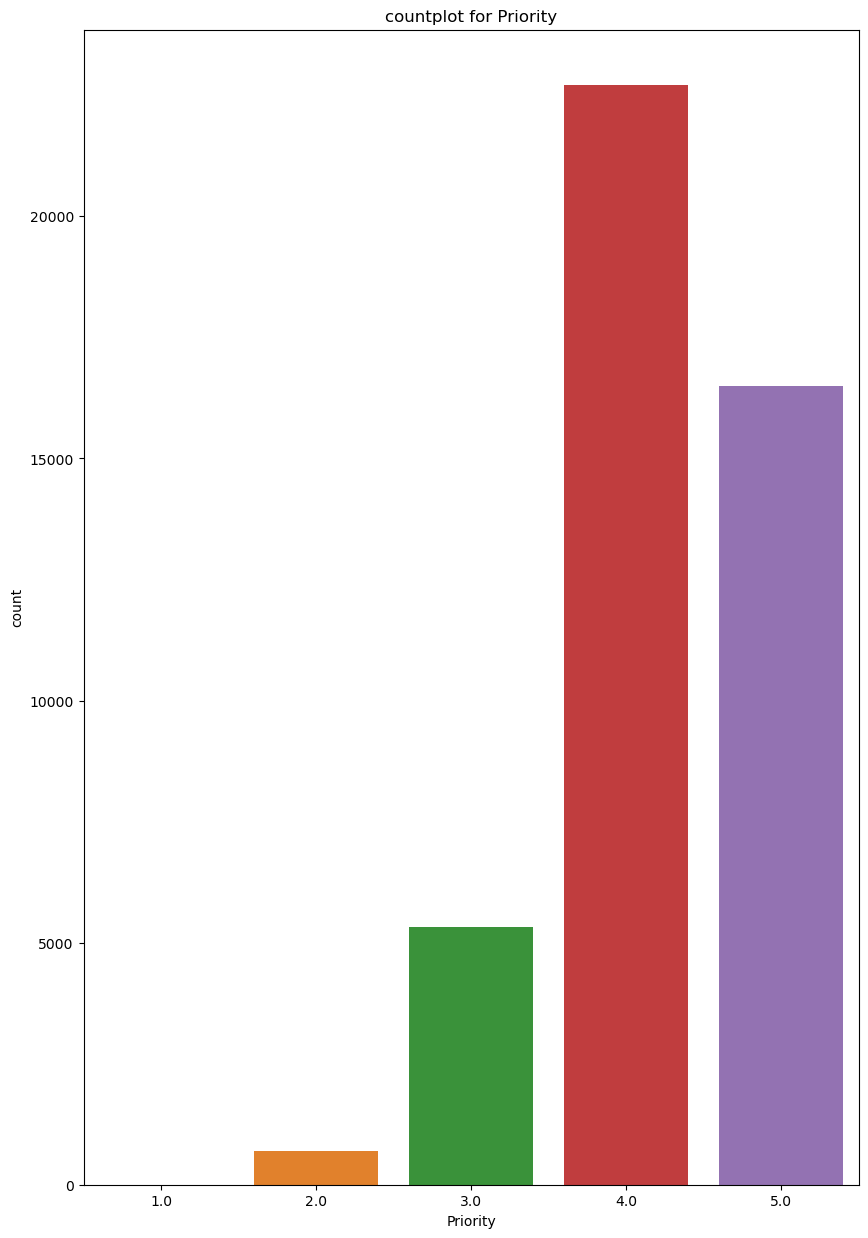

In [ ]:
plt.figure(figsize=(10,15))

for col in numerical_data:
    sns.countplot(x=df[col])
    plt.title(f'countplot for {col}')
    plt.xticks(rotation="vertical")
    plt.show()

### Data Preprocessing

In [5]:
missing_values = df.isna().sum()/len(df.index)*100
missing_values

CI_Name                        0.000000
CI_Cat                         0.238167
CI_Subcat                      0.238167
WBS                            0.000000
Incident_ID                    0.000000
Status                         0.000000
Impact                         0.000000
Urgency                        0.000000
Priority                       2.960992
number_cnt                     0.000000
Category                       0.000000
KB_number                      0.000000
Alert_Status                   0.000000
No_of_Reassignments            0.002146
Open_Time                      0.000000
Reopen_Time                   95.099343
Resolved_Time                  3.819251
Close_Time                     0.000000
Handle_Time_hrs                0.002146
Closure_Code                   0.986997
No_of_Related_Interactions     0.244604
Related_Interaction            0.000000
No_of_Related_Incidents       97.378020
No_of_Related_Changes         98.798438
Related_Change                98.798438


In [15]:
columns_to_drop = missing_values[missing_values > 90].index

In [16]:
df.drop(columns=columns_to_drop, inplace=True)


In [19]:
df.isnull().sum()


CI_Name                          0
CI_Cat                         111
CI_Subcat                      111
WBS                              0
Incident_ID                      0
Status                           0
Impact                           0
Urgency                          0
Priority                      1380
number_cnt                       0
Category                         0
KB_number                        0
Alert_Status                     0
No_of_Reassignments              1
Open_Time                        0
Resolved_Time                 1780
Close_Time                       0
Handle_Time_hrs                  1
Closure_Code                   460
No_of_Related_Interactions     114
Related_Interaction              0
dtype: int64

In [32]:
%matplotlib inline

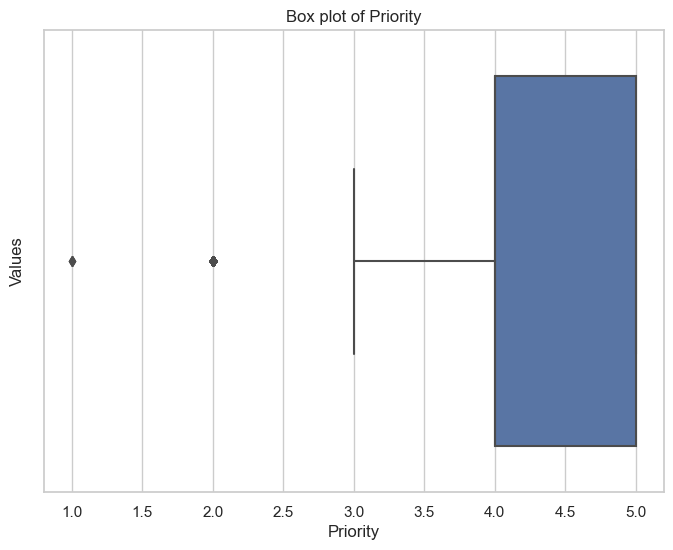

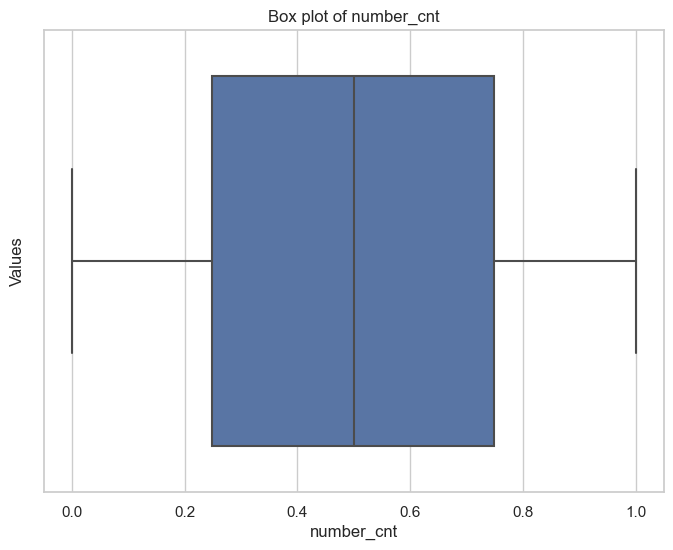

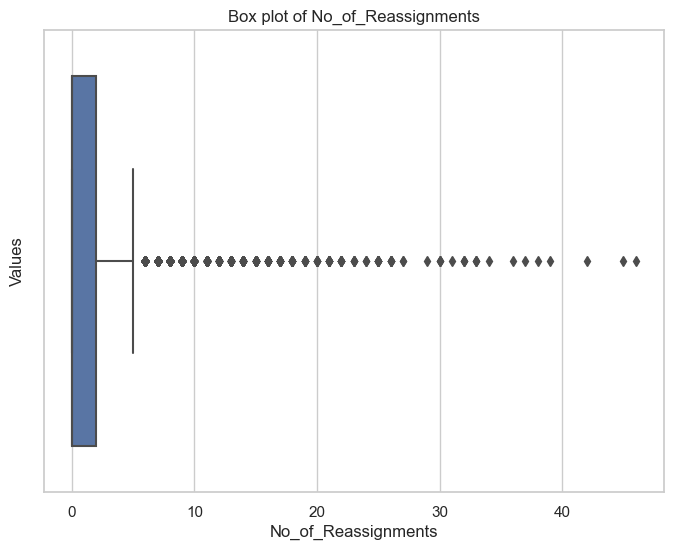

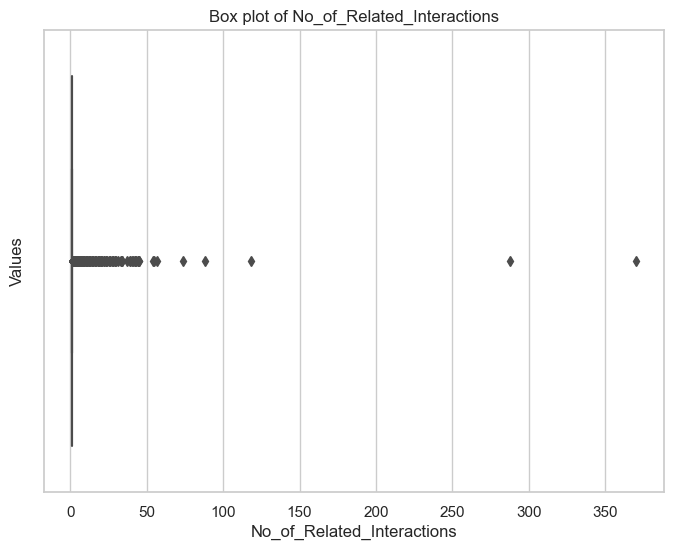

In [34]:
for column in numerical_data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.ylabel('Values')
    plt.show()


In [40]:
for col in numerical_data:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 -Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR

    df.loc[df[col] > upper_limit, col] = df[col].median()
    df.loc[df[col] < lower_limit, col] = df[col].median()

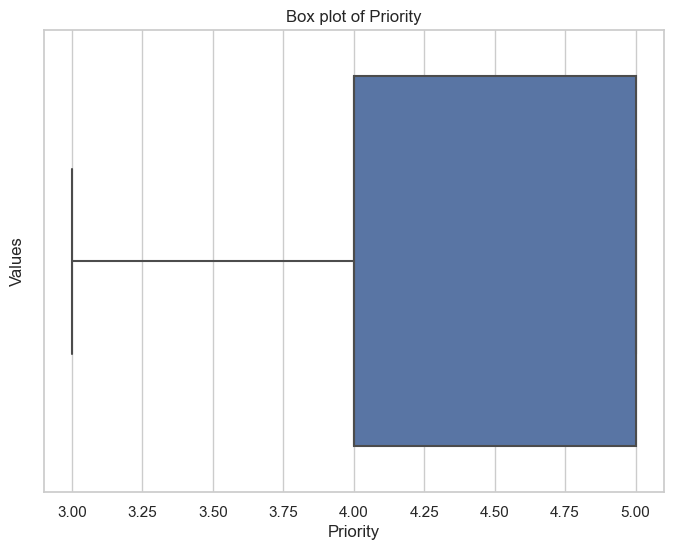

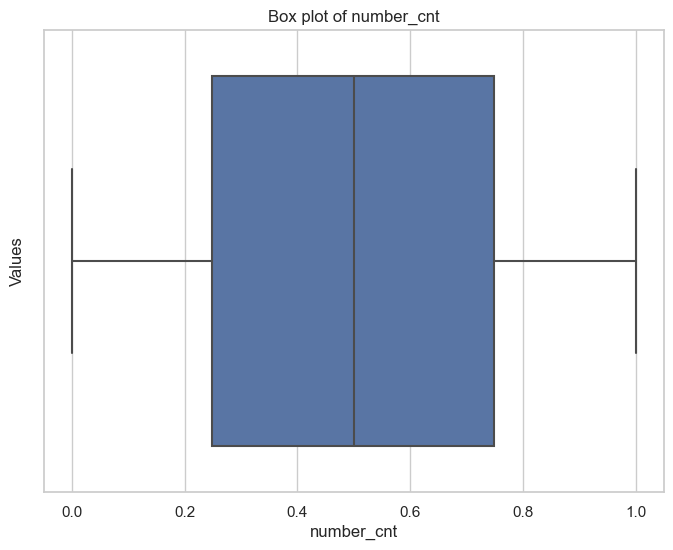

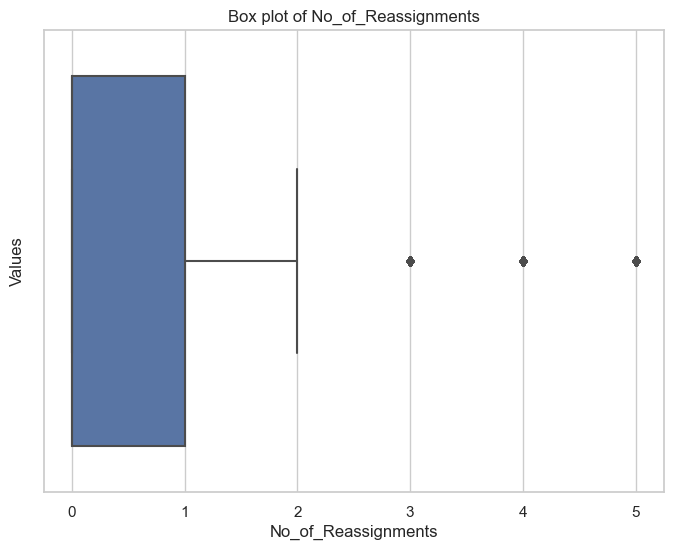

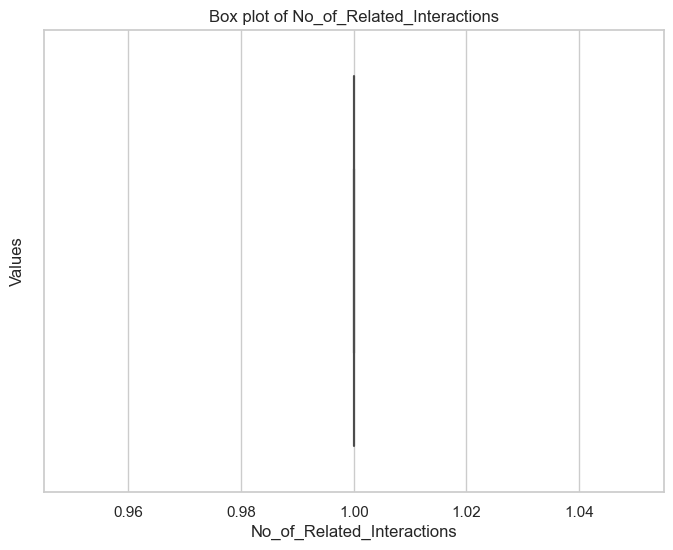

In [41]:
for column in numerical_data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.ylabel('Values')
    plt.show()


In [46]:
df.loc[df['No_of_Related_Interactions'] > upper_limit]


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction


In [47]:
df.loc[df['No_of_Related_Interactions'] < lower_limit]

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
